# Introducción a la Regresión Lineal

La regresión numérica es uno de los procedimientos que más se ha utilizado para el análisis predictivo. La idea es a partir de una hipótesis de modelo de relación entre las variables de entrada y salida, que a continuación es aplicado a los datos disponibles para generar los parámetros que mejor se ajustan al modelo, y es validado con algún test apropiado que brinde la confianza que a su vez permita aplicar este modelo para predecir valores con datos futuros. 

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import math

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Estilos de las gráfica
plt.style.use('bmh') #makes plots look pretty

# Preprocesado y modelado
# Sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, GridSearchCV, KFold, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.metrics import recall_score, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# Escalado de datos
from sklearn.preprocessing import scale

# Configuración ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import pingouin as pg #Correlación con intervalos de confianza
from scipy import stats
from scipy.stats import pearsonr
import scipy
import statsmodels.api as sm

## Regresión Lineal Simple

La regresión lineal es la forma más simple de regresión, ya que en ella se modelan los datos usando una línea recta. Se caracteriza, por la utilización de dos variables, una aleatoria; *y (llamada variable respuesta - dependiente)*, que es función lineal de otra variable aleatoria; *x (llamada variable independiente)*.

In [2]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
             "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
             "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
             "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
             "Atlanta","Washington","San.F","San.I","Seattle"]
numero_bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
                   5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
                   5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs= [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
          667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
          593, 556]

In [3]:
data = pd.DataFrame(list(zip(equipos, numero_bateos, runs)), columns = ['equipos', 'numero_bateos', 'runs'])
data

,equipos,numero_bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


**DIAGRAMAS DE DISTRIBUCIÓN**

(array([7., 2., 3., 6., 4., 2., 3., 0., 2., 1.]),
 array([5417. , 5446.3, 5475.6, 5504.9, 5534.2, 5563.5, 5592.8, 5622.1,
        5651.4, 5680.7, 5710. ]),
 <a list of 10 Patch objects>)

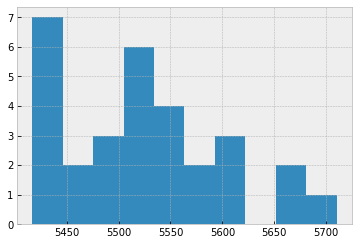

In [4]:
plt.hist(data['numero_bateos'])

(array([2., 4., 5., 3., 4., 7., 1., 1., 0., 3.]),
 array([556. , 587.9, 619.8, 651.7, 683.6, 715.5, 747.4, 779.3, 811.2,
        843.1, 875. ]),
 <a list of 10 Patch objects>)

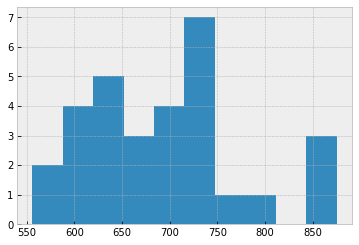

In [5]:
plt.hist(data['runs'])

In [6]:
slope, intercept, r, p, stderr = scipy.stats.linregress(data['numero_bateos'], data['runs'])
line = f'Línea de regresión: y={intercept:.2f}+{slope:.2f}x, Correlación={r:.2f}'
line

'Línea de regresión: y=-2789.24+0.63x, Correlación=0.61'

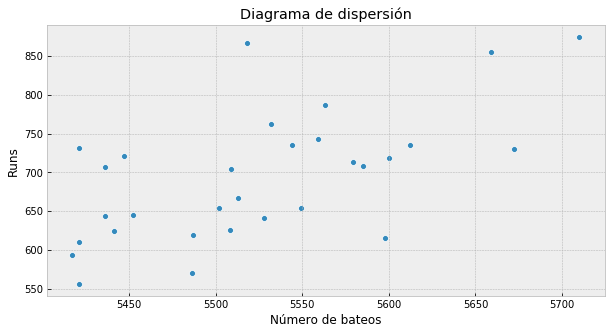

In [7]:
f_dims = (10, 5)
fig, ax = plt.subplots(figsize=f_dims)

sns.scatterplot(data=data, x='numero_bateos', y='runs', ax=ax)
ax.set_title("Diagrama de dispersión")
ax.set_xlabel("Número de bateos")
ax.set_ylabel("Runs")
plt.savefig("Correlación1.png", dpi=96, bbox_inches='tight') 

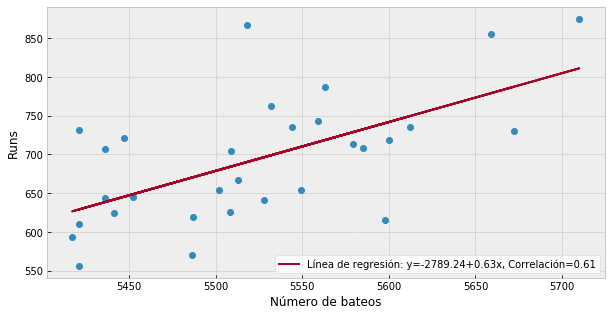

In [8]:
f_dims = (10, 5)
fig, ax = plt.subplots(figsize=f_dims)
ax.plot(data['numero_bateos'], data["runs"], linewidth=0, marker='o')
ax.plot(data['numero_bateos'], intercept + slope * data['numero_bateos'], label=line)
ax.set_xlabel("Número de bateos")
ax.set_ylabel("Runs")
ax.legend(facecolor='white')
plt.show()

In [9]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
data_a = data['numero_bateos']
data_b = data['runs']

r, p = stats.pearsonr(data_a, data_b)
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data_a, data_b)
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data_a, data_b)
print(f"Correlación Kendall: r={r}, p-value={p}")

Correlación Pearson: r=0.6106270467206685, p-value=0.0003388351359791999
Correlación Spearman: r=0.6040298678154843, p-value=0.00040852438606748853
Correlación Kendall: r=0.4467604562142454, p-value=0.000566915544734986


In [10]:
data.corr('kendall')

,numero_bateos,runs
numero_bateos,1.00000,0.44676
runs,0.44676,1.00000


In [11]:
display(stats.pearsonr(data_a,data_b))

(0.6106270467206685, 0.0003388351359791999)

El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

### Ajuste del modelo

Se ajusta un modelo empleando como variable respuesta **runs** y como predictor **numero_bateos**. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

#### Sklearn

In [12]:
# División de los datos en train y test
# ==============================================================================
X = data[['numero_bateos']]
y = data['runs']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12, shuffle=True)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 1) (24,) (6, 1) (6,)


Python proporciona una amplia variedad de librerías e implementaciones sólidas en cuanto algoritmos de Machine Learning. Uno de los más conocidos es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. 

**Scikit-Learn** se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa.

In [13]:
print(LinearRegression.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, optional, default True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, optional, default False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
        an estimator with ``normalize=False``.

    copy_X : bool, optional, default True
   

In [14]:
# Creación del modelo
# ==============================================================================
# Creamos un objeto de la clase LinearRegression
modelo_linear = LinearRegression() 

Muchos objetos sklearn implementan tres métodos específicos, a saber fit(), predict() y fit_predict(). Básicamente, son convenciones aplicadas en scikit-learn y su API.

`fit()` es implementado por cada estimador y acepta una entrada para los datos de muestra (X) y para modelos supervisados también acepta un argumento para etiquetas (es decir, datos de destino y). Opcionalmente, también puede aceptar propiedades de muestra adicionales como pesos, etc.

In [15]:
# Entrenamos nuestro modelo
modelo_linear.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Atributo intercept_(intercepto) de nuestro objeto
modelo_linear.intercept_

-2885.7388139340533

In [17]:
# Atributo coef_ (pendiente) de nuestro objeto
modelo_linear.coef_

array([0.64692114])

In [18]:
# Información del modelo
# ==============================================================================
print("Intercepto:", modelo_linear.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_linear.coef_.flatten(),)))
print("Coeficiente de determinación R^2:", modelo_linear.score(X, y))

Intercepto: -2885.7388139340533
Coeficiente: [('numero_bateos', 0.6469211405540737)]
Coeficiente de determinación R^2: 0.3670113392883752


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test, de esta manera se mide el desempeño de los resultados ante datos desconocidos en la etapa de entrenamiento.

**Evaluación del modelo**

In [19]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo_linear.predict(X = X_test)
print(predicciones)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[638.04063866 621.22068901 621.22068901 680.73743394 808.18089863
 677.50282824]

El error (rmse) de test es: 66.42001830376033


In [20]:
print(y_test)

7     721
22    610
18    731
14    667
1     875
21    625
Name: runs, dtype: int64


In [21]:
line = f'Línea de regresión: y={modelo_linear.intercept_}+{modelo_linear.coef_}x'
line

'Línea de regresión: y=-2885.7388139340533+[0.64692114]x'

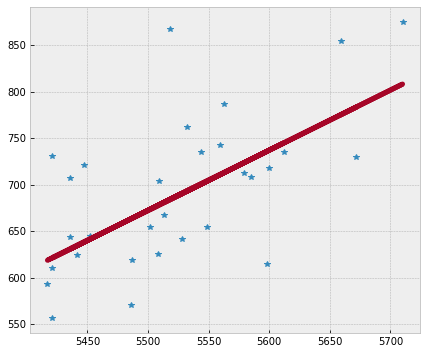

In [22]:
#Realicemos una grefica de nuestro de nuestra linea recta
plt.figure(figsize=(7,6))
plt.plot(X, y , '*')

y_predict = modelo_linear.intercept_ + modelo_linear.coef_*X
plt.plot(X, y_predict, lw=5)

#### Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

## Regresión Lineal Múltiple

La Regresión Lineal Múltiple es una extensión de la regresión lineal que involucra más de una variable independiente, y permite que la variable repuesta sea planteada como una función lineal de un vector multidimensional.

La función que se ajusta a los datos está dada por:

\begin{equation}
\hat y = a_0 + b_1x_1 + b_2x_2 + ... + b_px_p 
\end{equation}

Los coeficientes de regresión se interpretan como el efecto de la variable Xi en la variable dependiente Y, cuando el resto de las variables se mantienen constantes; es decir, el cambio producido en la variable dependiente Y por cada incremento unitario en la regresora Xi manteniendo constante el resto de las predictoras.

La función de pérdida está dada por:

\begin{equation}
Loss = J = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2
\end{equation}


**Ejemplo**

In [23]:
# Datos
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})
datos.head()

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Relación entre variables**

Un primer procedimiento al momento de iniciar con un modelo lineal es analizar la correlación existente entre las variables. Con el fin de encontrar información importante sobre los mejores predictores para el modelo y detectar colinealidad entre los mismos.

In [24]:
datos.corr()

,tv,radio,periodico,ventas
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
periodico,0.056648,0.354104,1.000000,0.228299
ventas,0.782224,0.576223,0.228299,1.000000


In [25]:
# Pares de variables más correlacionadas entre si
corr_mat = datos.corr()

for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat.abs().idxmax()

tv           ventas
radio        ventas
periodico     radio
ventas           tv
dtype: object

In [26]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de corr de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr()
tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
3,tv,ventas,0.782224,0.782224
12,ventas,tv,0.782224,0.782224
7,radio,ventas,0.576223,0.576223
13,ventas,radio,0.576223,0.576223
6,radio,periodico,0.354104,0.354104
9,periodico,radio,0.354104,0.354104
11,periodico,ventas,0.228299,0.228299
14,ventas,periodico,0.228299,0.228299
2,tv,periodico,0.056648,0.056648
8,periodico,tv,0.056648,0.056648


AttributeError: module 'seaborn' has no attribute 'histplot'

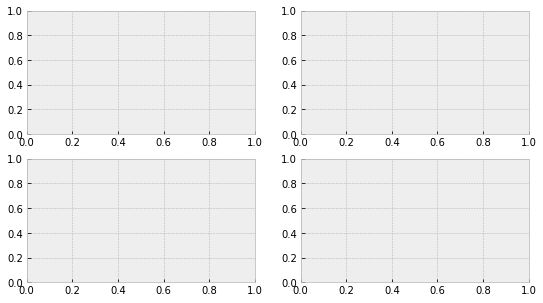

In [27]:
# Distribución para cada variable numérica
# Se ajusta el número de subplots en función al número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución para variables numéricas', fontsize = 10, fontweight = "bold");

**Definir variables predictores y la variable a predecir**

In [ ]:
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

**Separación del conjunto de datos en entrenamiento y prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size   = 0.2,random_state = 1234,shuffle= True)

**Instanciamos el modelo OLS**

In [ ]:
import statsmodels.api as sm

In [ ]:
print(sm.OLS.__doc__)


    Ordinary Least Squares

    Parameters
    ----------
    endog : array_like
        A 1-d endogenous response variable. The dependent variable.
    exog : array_like
        A nobs x k array where `nobs` is the number of observations and `k`
        is the number of regressors. An intercept is not included by default
        and should be added by the user. See
        :func:`statsmodels.tools.add_constant`.
    missing : str
        Available options are 'none', 'drop', and 'raise'. If 'none', no nan
        checking is done. If 'drop', any observations with nans are dropped.
        If 'raise', an error is raised. Default is 'none'.
    hasconst : None or bool
        Indicates whether the RHS includes a user-supplied constant. If True,
        a constant is not checked for and k_constant is set to 1 and all
        result statistics are calculated as if a constant is present. If
        False, a constant is not checked for and k_constant is set to 0.
    **kwargs
        Extra

In [ ]:
# Creación del modelo utilizando matrices (scikitlearn)
# A la matriz de predictores hay que añadirle una columna para el intercepto del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)

**Entrenar el modelo**

In [ ]:
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.01e-75
Time:                        18:55:02   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8497      0.365      7.803      0.0

El modelo tiene un R2 alto (0,894). Esto significa que el modelo es capaz de explicar el 89.4% de la variabilidad observada en las ventas. El valor-P del modelo es significativo (1,01e-75).

Según el valor-P obtenido para el coeficiente de regresión de "periodico" (0,723), la variable no contribuye de forma significativa al modelo. Por lo tanto, se podría entrenar de nuevo el modelo excluyendo "periodico" como variable predictora.

In [ ]:
# Coeficientes
print("Coeficientes del modelo")
print(modelo.params)
# Intervalos del 95% para los coeficientes del modelo
print("")
print("Intervalos teóricos")
print(modelo.conf_int(alpha=0.05))

Coeficientes del modelo
const        2.849668
tv           0.045601
radio        0.189273
periodico    0.002375
dtype: float64

Intervalos teóricos
                  0         1
const      2.128275  3.571062
tv         0.042457  0.048745
radio      0.170603  0.207944
periodico -0.010827  0.015578


In [ ]:
# Intervalos de confianza para los coeficientes del modelo

intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,2.128275,3.571062
tv,0.042457,0.048745
radio,0.170603,0.207944
periodico,-0.010827,0.015578


In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento

prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

Text(0.5, 0.98, 'Diagnóstico residuos')

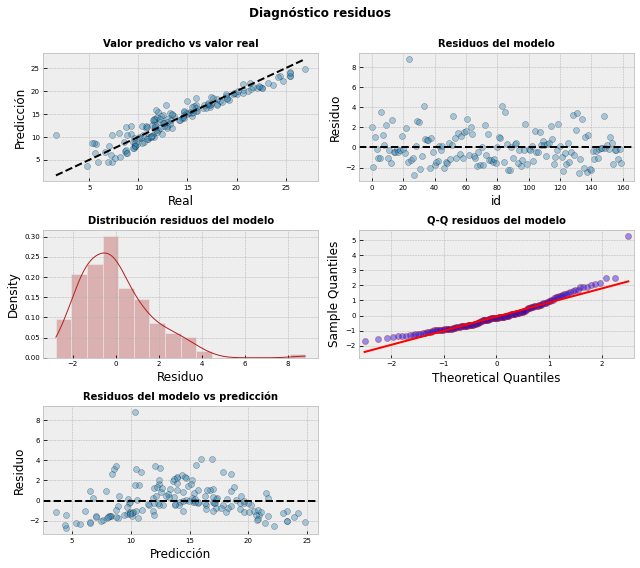

In [ ]:
# Gráficos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

Se percibe que el error no se distribuye de forma aleatoria alrededor de cero. También parece que sostiene la misma variabilidad a lo largo del eje X. Estos comportamientos pueden indicar falta de homocedasticidad, por lo tanto el error no seguiría una distribución normal.

**Supuestos de normalidad**

1. Que el error se distribuye normal
2. Que no haya multicolinealidad (dependencia fuerte) entre los regresores
3. Homogeneidad de varianzas

Prueba de normalidad

Utilizando el test de Shapiro-Wilk, y D'Agostino's K-squared test, se buscará probar si el error sigue una distribución normal. D'Agostino's K-squared test es el que incluye el summary de statsmodels con el nombre de Omnibus.

Para ambos tests
+ H0: los datos siguen una distribución normal
+ H1: los datos no siguen una distribución normal

Si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar H0 (que los datos se distribuyen normal).

**Evaluación del modelo**

In [ ]:
# Error de test del modelo 

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (RMSE) de test es: {rmse}")

El error (RMSE) de test es: 1.704667427572053


**Interpretación:** 

El modelo de regresión lineal múltiple:

ventas = 2.8497 + 0.0456 * tv + 0.1893 * radio + 0.0024 * periodico
 
La ecuación anterior puede explicar el 89.4% de la varianza observada en las ventas. El test F es significativo (valor-P: 1.01e-75). Hay evidencias de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se cumplen los supuestos de normalidad. Por lo tanto, los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (RMSE) de test es de aproximadamente de 1.705. Las predicciones del modelo final se alejan en promedio 1.705 unidades del valor real.

In [28]:
# Extract data
X2 = datos[['tv', 'radio', 'periodico']]
y2 = datos['ventas']

In [29]:
# With skylearn
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=12, shuffle=True)
print (X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

(160, 3) (160,) (40, 3) (40,)


In [30]:
# Train
modelo_linear2 = LinearRegression()
modelo_linear2.fit(X = X_train2, y = y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print("Coeficiente", modelo_linear2.coef_)
predicciones = modelo_linear2.predict(X = X_test2)
print(predicciones)

Coeficiente [ 0.04452235  0.19286187 -0.00465557]
[16.39007308  6.55142872  7.75824723 14.53202646 13.33028039 17.25724194
 22.70246331  7.56542867 11.11617935 12.16590506 16.20688599 11.89552242
  8.6982841  14.33284955 23.90604787  9.90237465 11.29089546 12.63485551
 13.73025584 14.93273641 20.82213372 11.03622634 22.81579474  7.85544991
 16.34325529  9.39298831 13.20801647 11.595813    3.62943523 11.70631855
  9.12735107 23.85164956 16.31341962 20.96174927  6.14548653 19.77913484
 12.30781253 21.19176851 12.43898029 12.55735255]


In [40]:
rmse = mean_squared_error(
        y_true  = y_test2,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.6772719230294282


In [43]:
# R2
print("R^2:", modelo_linear2.score(X2, y2))

R2 0.8964686291342123
